#Self Learning Project 
#Ayushman Dev Verma 
#Dipanshu Sharma 


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yahoofinancials

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pmdarima

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import figure


from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [5]:
# defining categories 

category1 = 'BTC-USD' # bitcoin
category2 = 'ETH-USD' # etherium coin
category3 = 'USDT-USD' # tether coin
category4 = 'BNB-USD' # Binance coin 
category5 = 'ADA-USD' # cardano coin 
category6 = 'HEX-USD' # hex coin  
category7 = 'XRP-USD' # XRP Coin 
category8 = 'USDC-USD' #  USD coin 
category9 = 'DOGE-USD' # Doge coin 
category10 = 'DOT1-USD' # Polka Dot coin 

In [1]:
user_dict={}

user_dict['category1'] = 'BTC-USD'
user_dict['category2'] = 'ETH-USD' 
user_dict['category3'] = 'USDT-USD' 
user_dict['category4'] = 'BNB-USD' 
user_dict['category5'] = 'ADA-USD' 
user_dict['category6'] = 'HEX-USD'  
user_dict['category7'] = 'XRP-USD' 
user_dict['category8'] = 'USDC-USD' 
user_dict['category9'] = 'DOGE-USD'  
user_dict['category10'] = 'DOT1-USD'

In [2]:
user_dict

{'category1': 'BTC-USD',
 'category2': 'ETH-USD',
 'category3': 'USDT-USD',
 'category4': 'BNB-USD',
 'category5': 'ADA-USD',
 'category6': 'HEX-USD',
 'category7': 'XRP-USD',
 'category8': 'USDC-USD',
 'category9': 'DOGE-USD',
 'category10': 'DOT1-USD'}

In [6]:
# open = starting price on the openeing day 
# high  = highest price attained on the same day 
# Low = lowest price attained on the same day 
# Close = closing price on the same day 
# Adj close  = splitting phenomenon # adjusted close 
# volume  = total number coins available in the market on the same day 


In [7]:
df = yf.download(category1, progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,20434789545
2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,23148267245
2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559


In [8]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2.498000e+03
mean,8140.444873,8372.200214,7882.083963,8152.047778,8152.047778,1.300339e+10
std,12126.198159,12502.771081,11676.749283,12132.712934,12132.712934,1.978315e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,536.806763,558.810013,531.769989,540.345245,540.345245,7.008715e+07
50%,4613.044922,4876.219971,4470.325195,4656.935059,4656.935059,4.185665e+09
75%,9337.584229,9505.003906,9193.153809,9336.247559,9336.247559,1.972123e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2014-09-17 to 2021-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2498 non-null   float64
 1   High       2498 non-null   float64
 2   Low        2498 non-null   float64
 3   Close      2498 non-null   float64
 4   Adj Close  2498 non-null   float64
 5   Volume     2498 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 136.6 KB


In [11]:
columns = list(df.columns)

In [12]:
columns

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

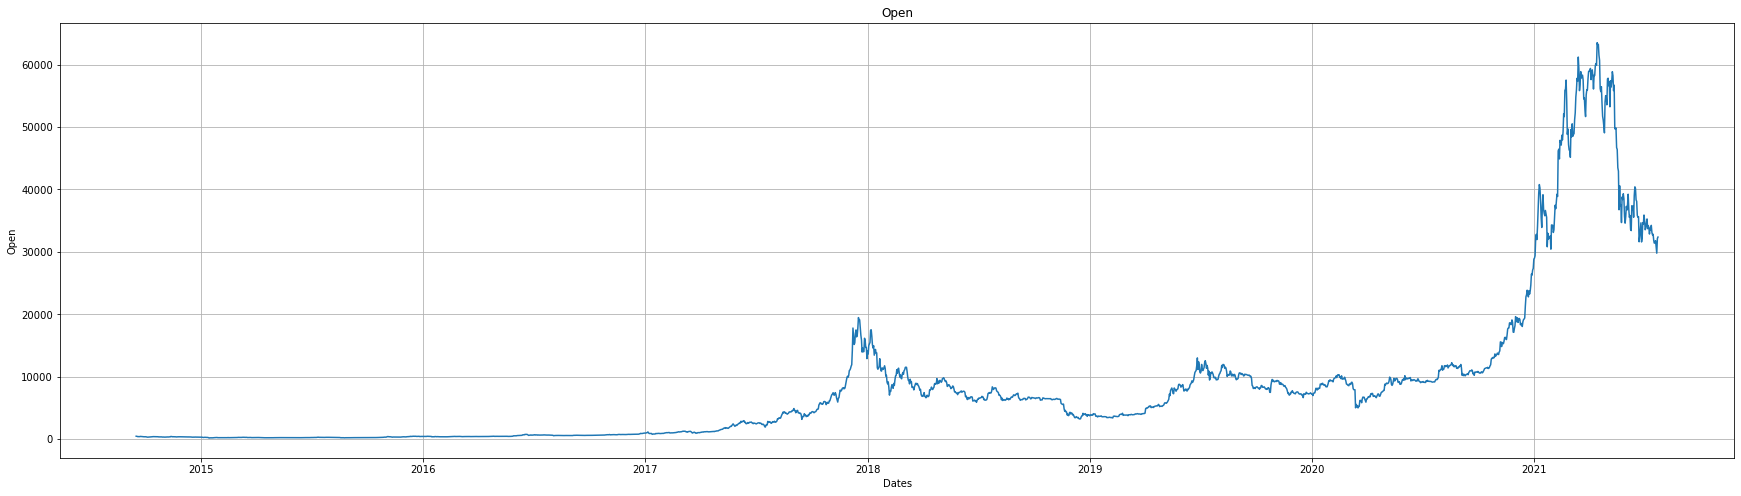

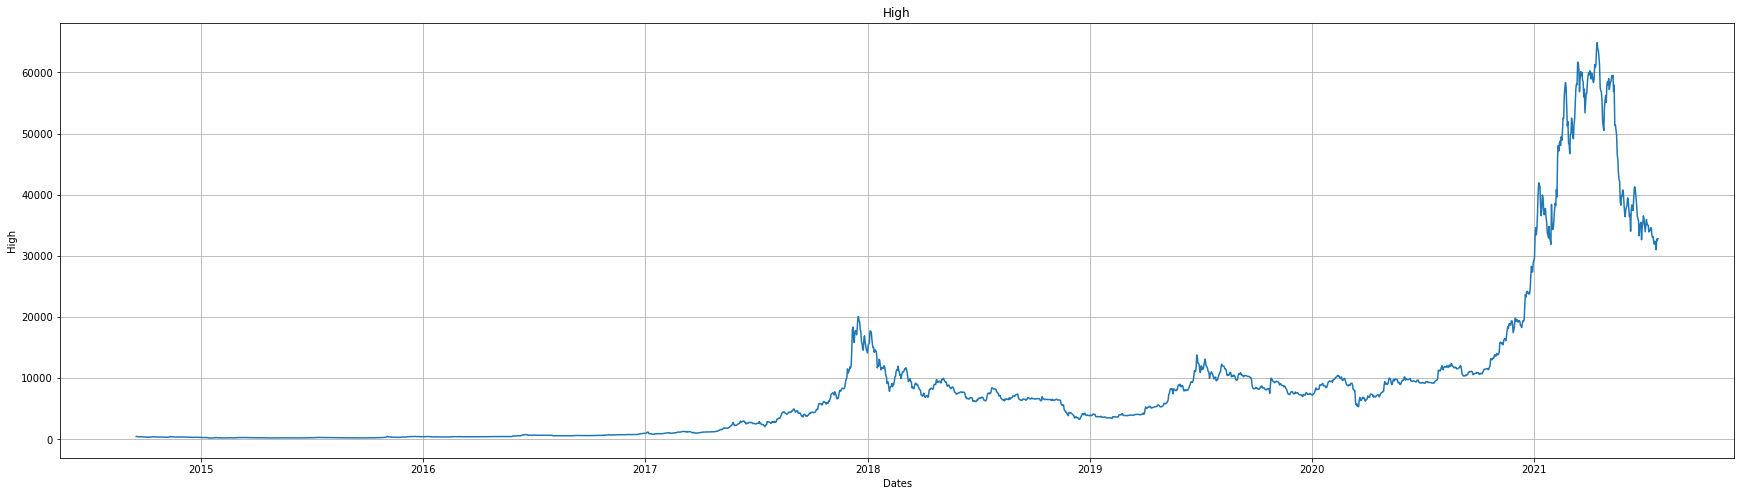

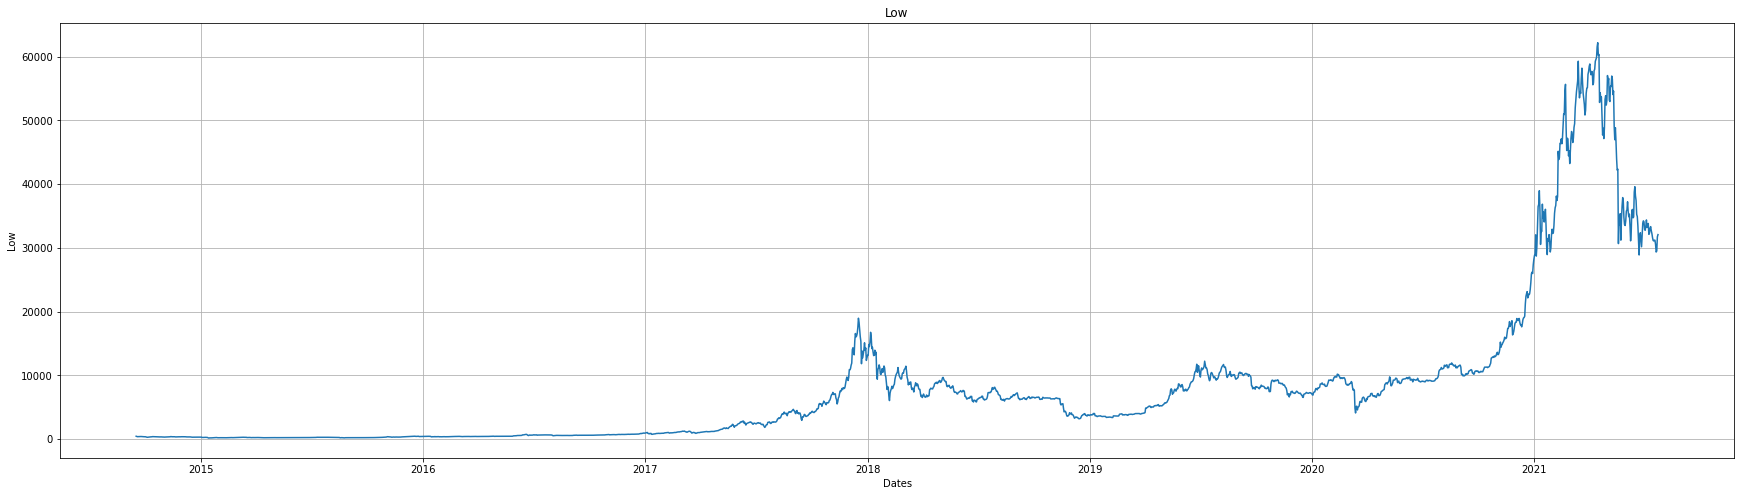

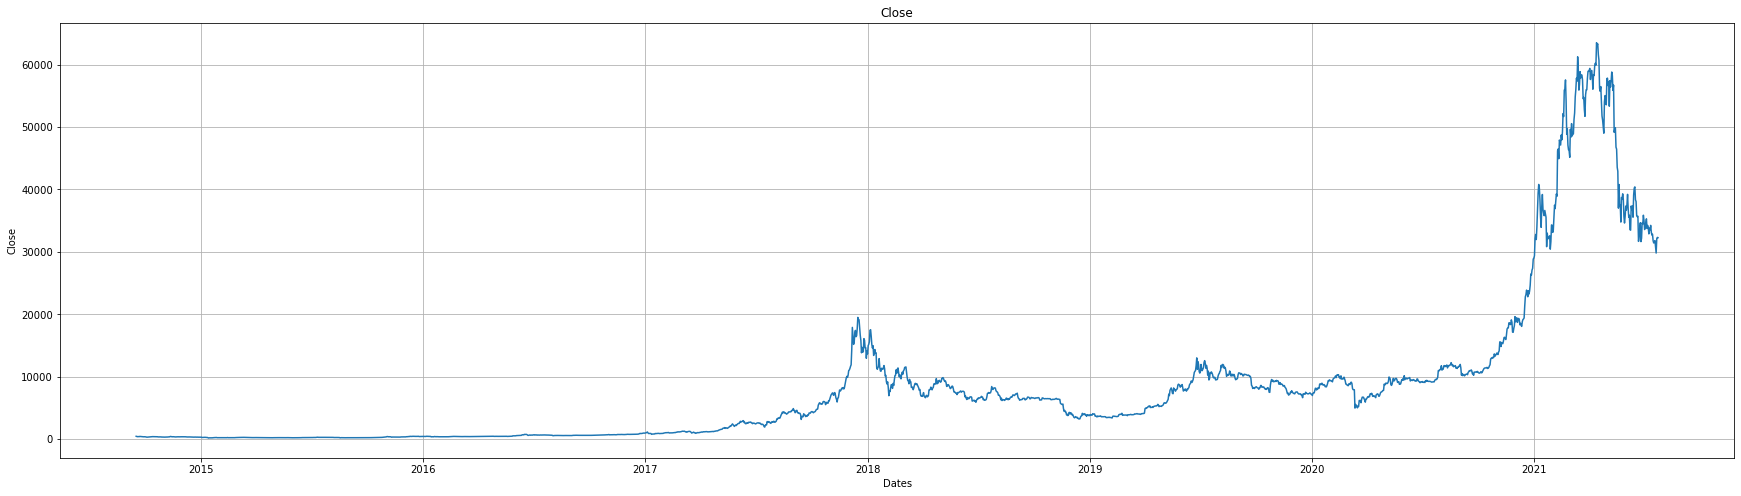

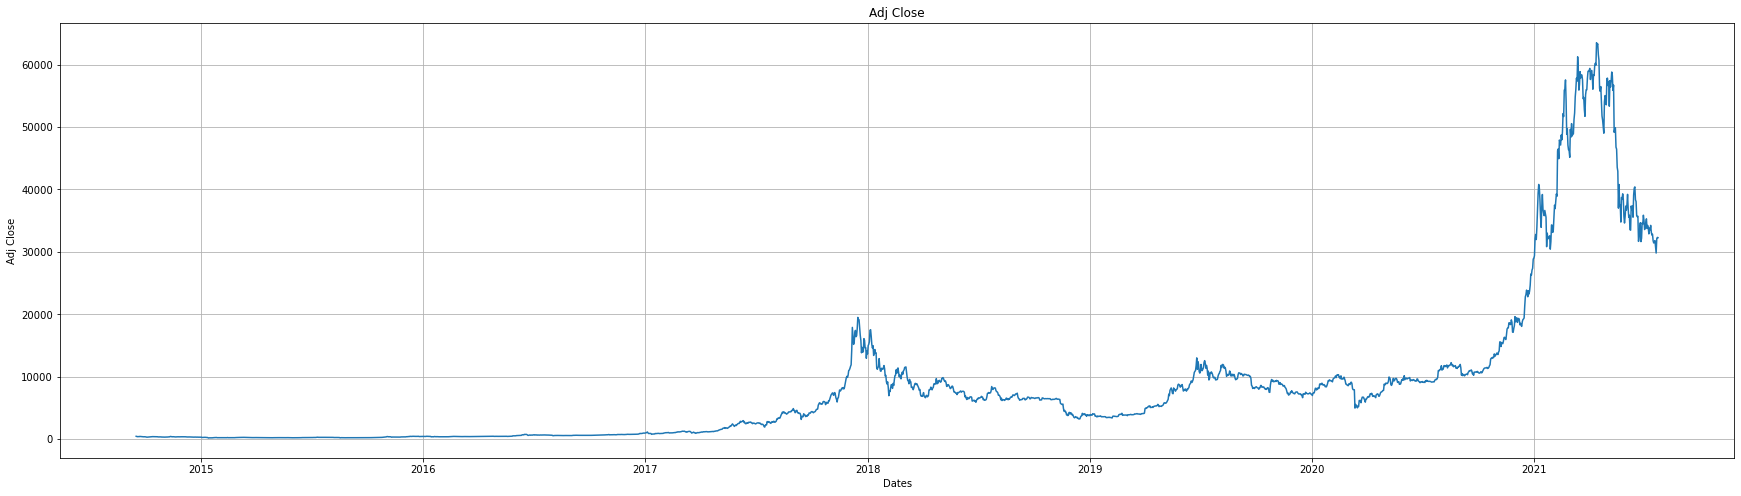

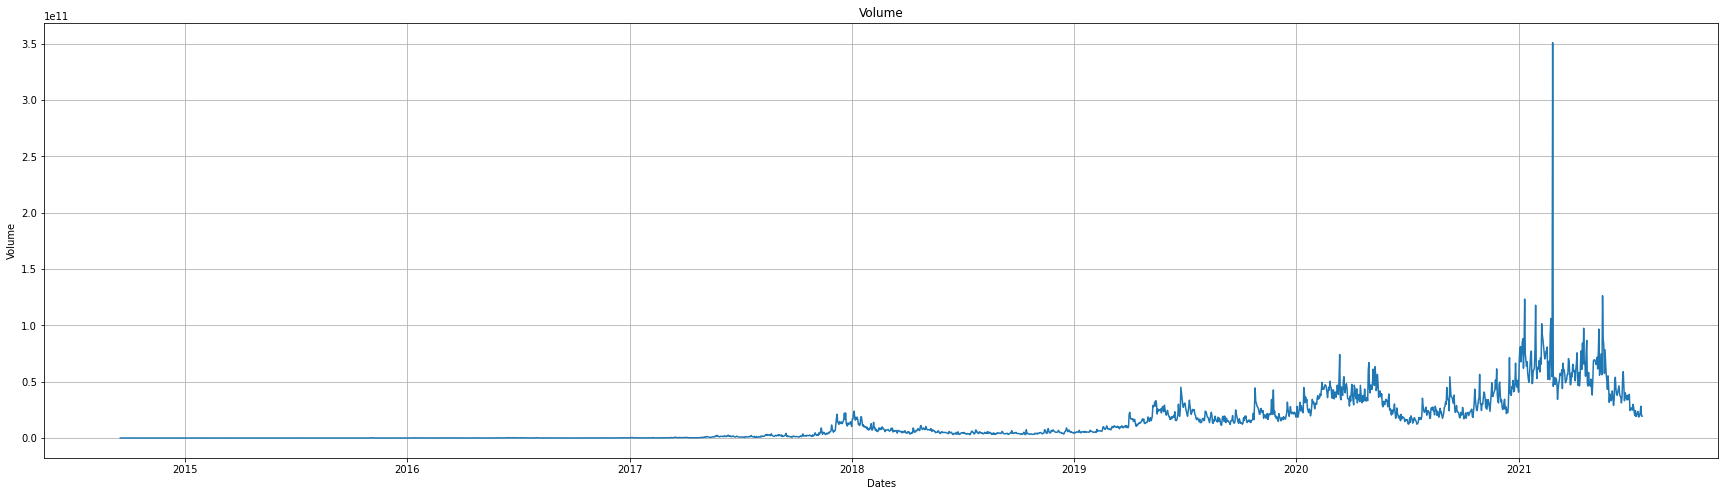

In [14]:
for col in columns:

    plt.figure(figsize=(30,8))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel(col)
    plt.plot(df[col])
    plt.title(col)
    plt.show()


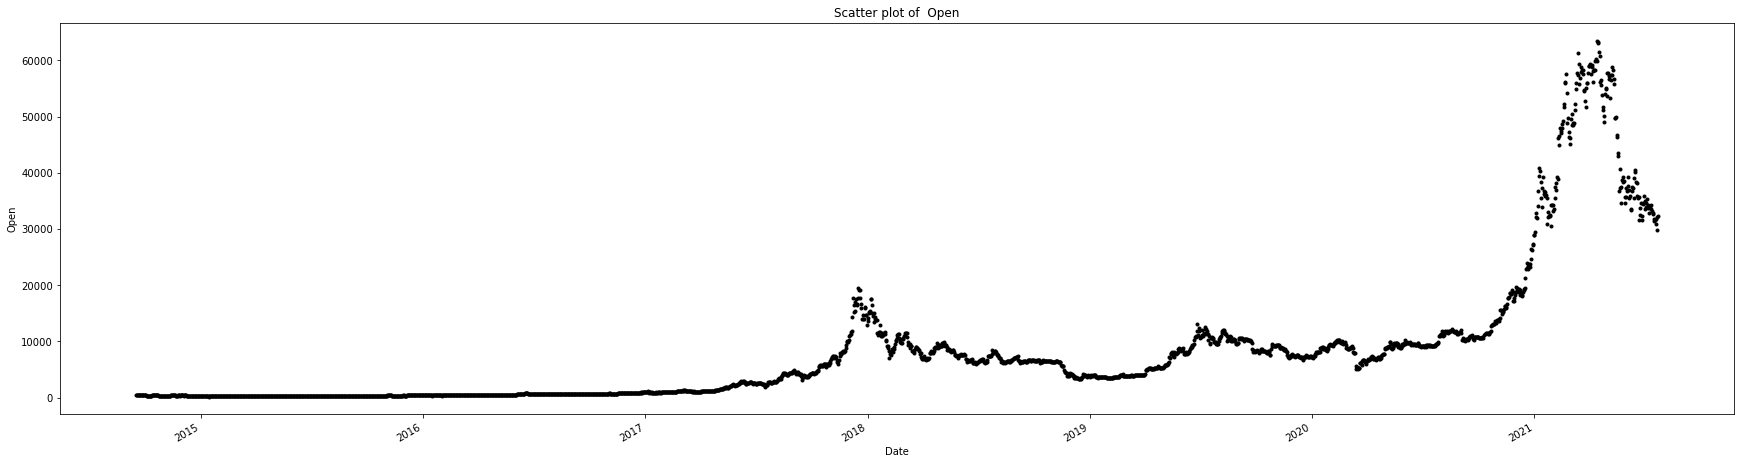

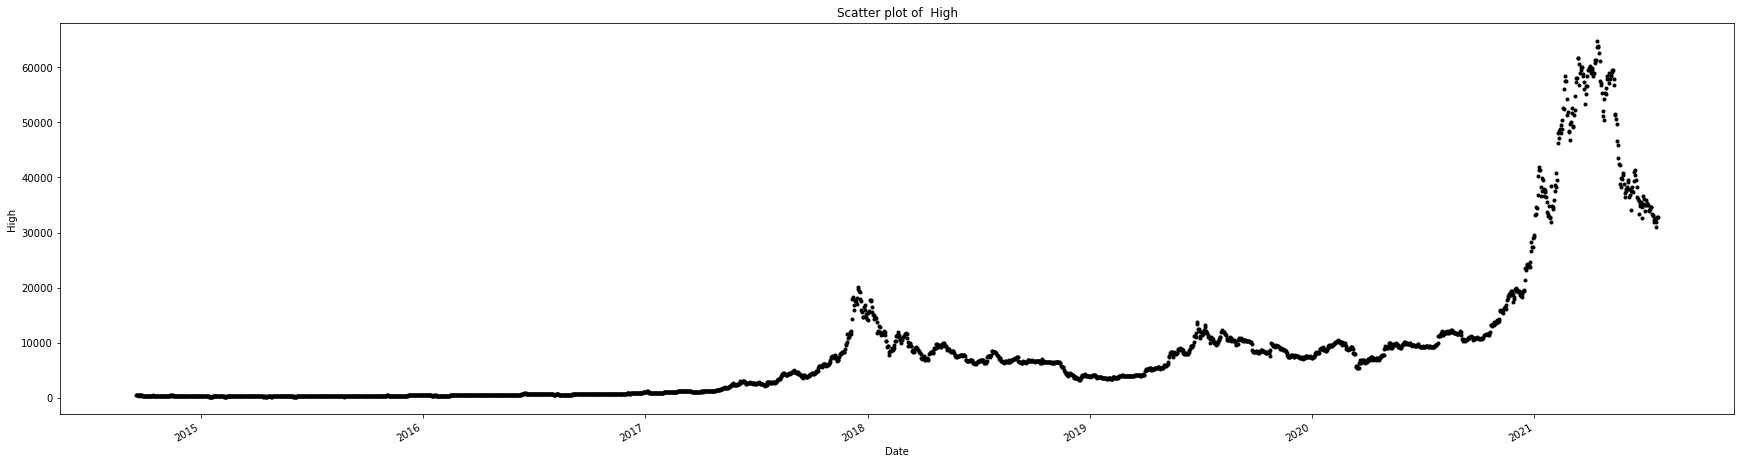

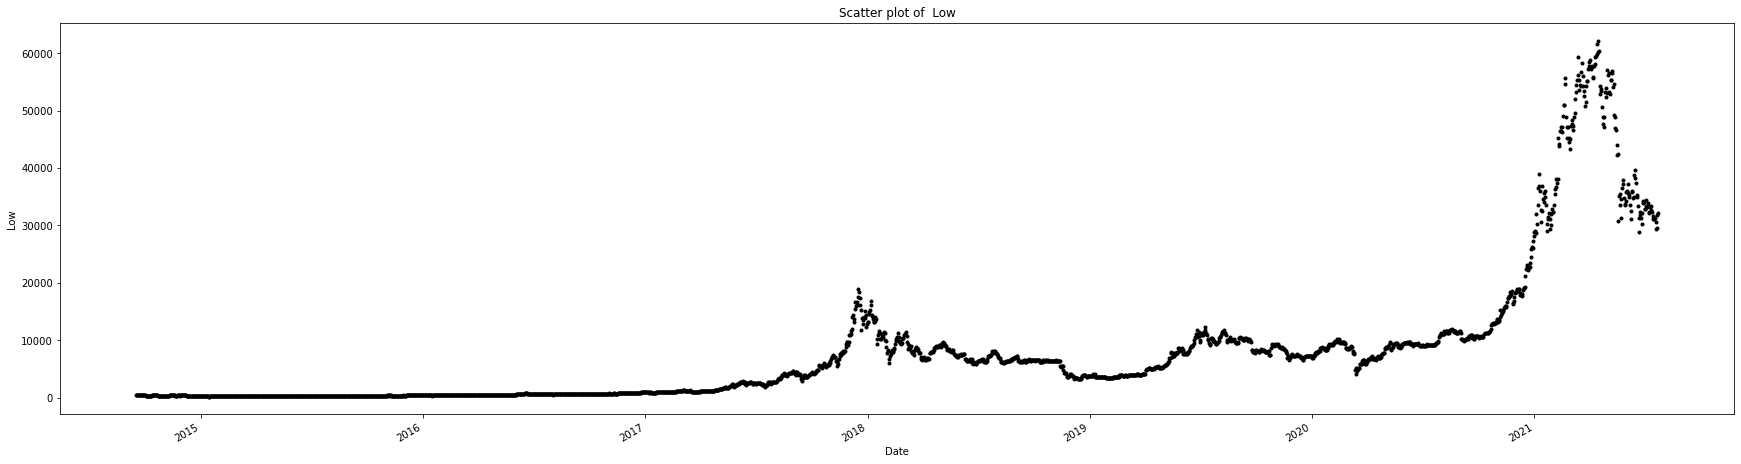

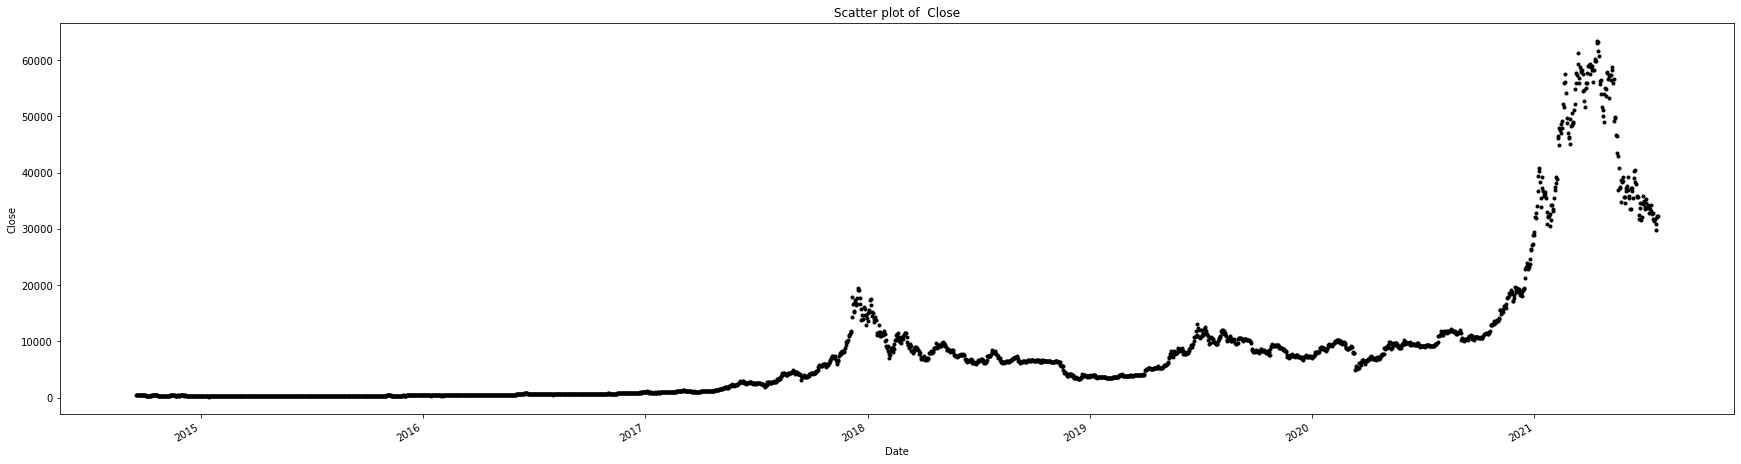

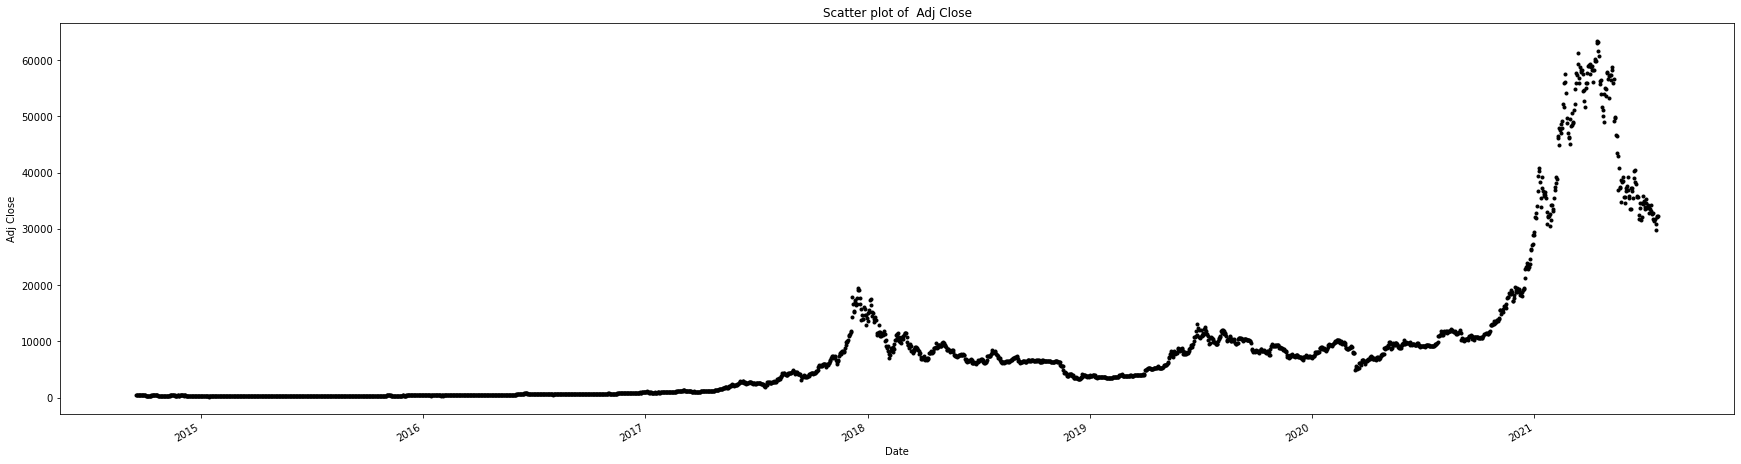

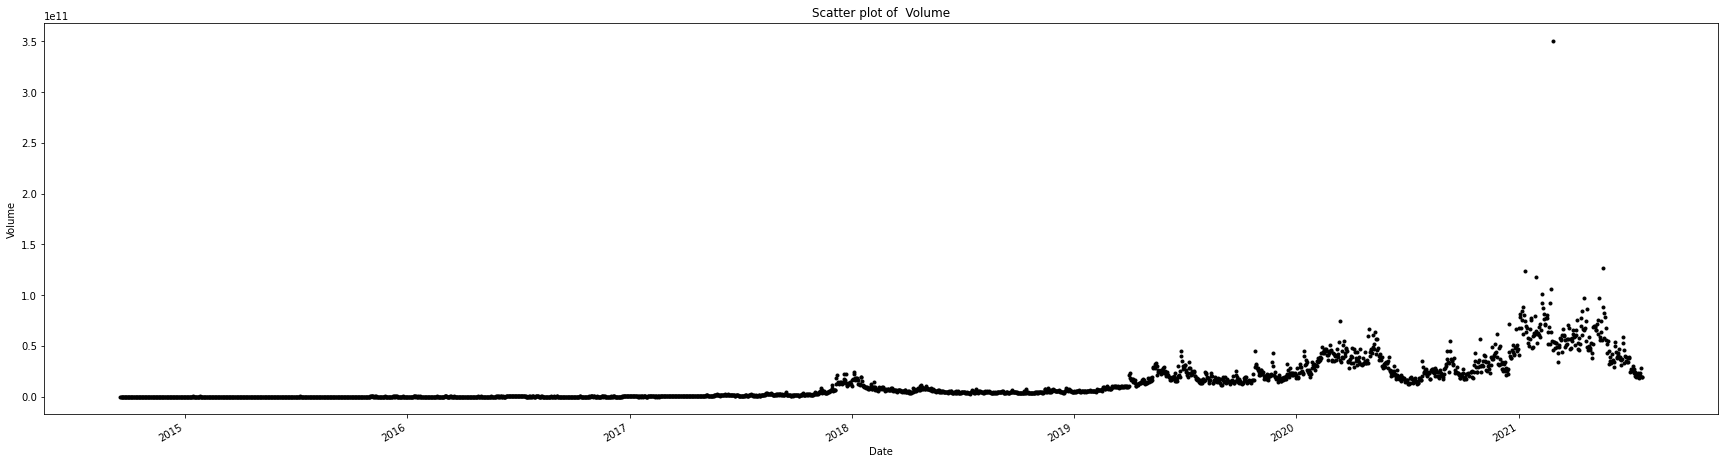

In [23]:
for col in columns:
    plt.figure(figsize=(30,8))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel(col)
    df[col].plot(style='k.')
    plt.title('Scatter plot of '+' '+ col )
    plt.show()
    

In [24]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

Open



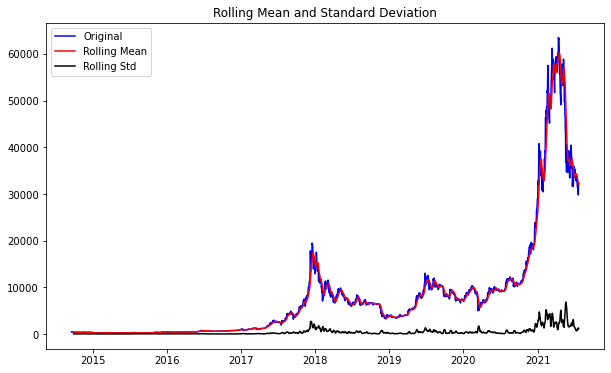

Results of dickey fuller test
Test Statistics                  -0.923754
p-value                           0.780049
No. of lags used                 27.000000
Number of observations used    2470.000000
critical value (1%)              -3.433000
critical value (5%)              -2.862711
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

High



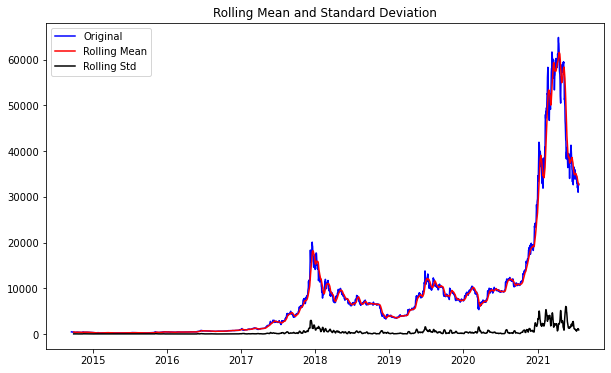

Results of dickey fuller test
Test Statistics                  -1.030065
p-value                           0.742142
No. of lags used                 27.000000
Number of observations used    2470.000000
critical value (1%)              -3.433000
critical value (5%)              -2.862711
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Low



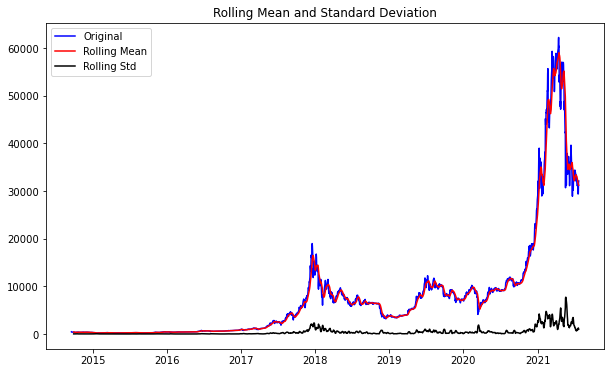

Results of dickey fuller test
Test Statistics                  -0.872158
p-value                           0.797003
No. of lags used                 27.000000
Number of observations used    2470.000000
critical value (1%)              -3.433000
critical value (5%)              -2.862711
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Close



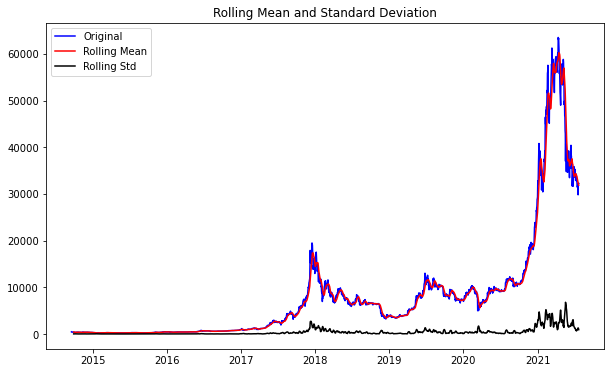

Results of dickey fuller test
Test Statistics                  -0.874043
p-value                           0.796400
No. of lags used                 26.000000
Number of observations used    2471.000000
critical value (1%)              -3.432999
critical value (5%)              -2.862710
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Adj Close



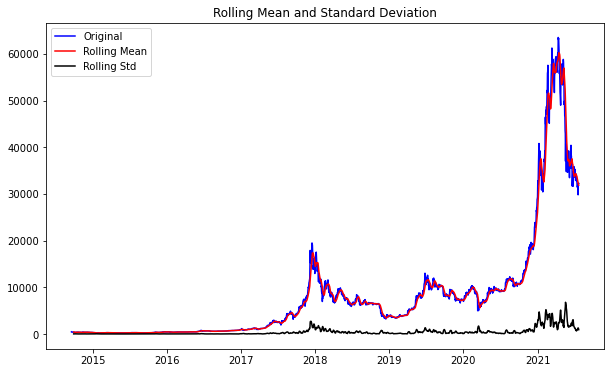

Results of dickey fuller test
Test Statistics                  -0.874043
p-value                           0.796400
No. of lags used                 26.000000
Number of observations used    2471.000000
critical value (1%)              -3.432999
critical value (5%)              -2.862710
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Volume



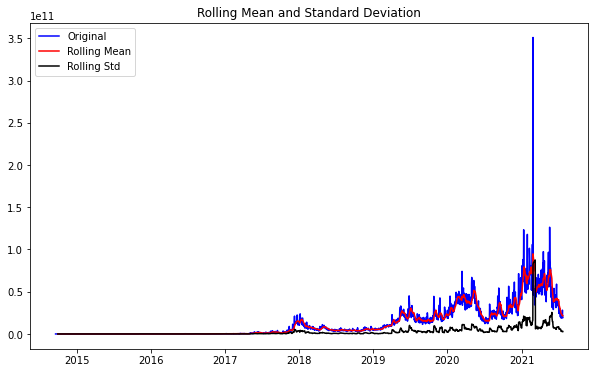

Results of dickey fuller test
Test Statistics                  -1.556716
p-value                           0.505292
No. of lags used                 27.000000
Number of observations used    2470.000000
critical value (1%)              -3.433000
critical value (5%)              -2.862711
critical value (10%)             -2.567393
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [25]:
for col in columns:
    print('\033[1m' + col)
    print('\033[0m')
    timeseries = df[col]
    test_stationarity(timeseries)
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print()
    
    

<Figure size 720x432 with 0 Axes>

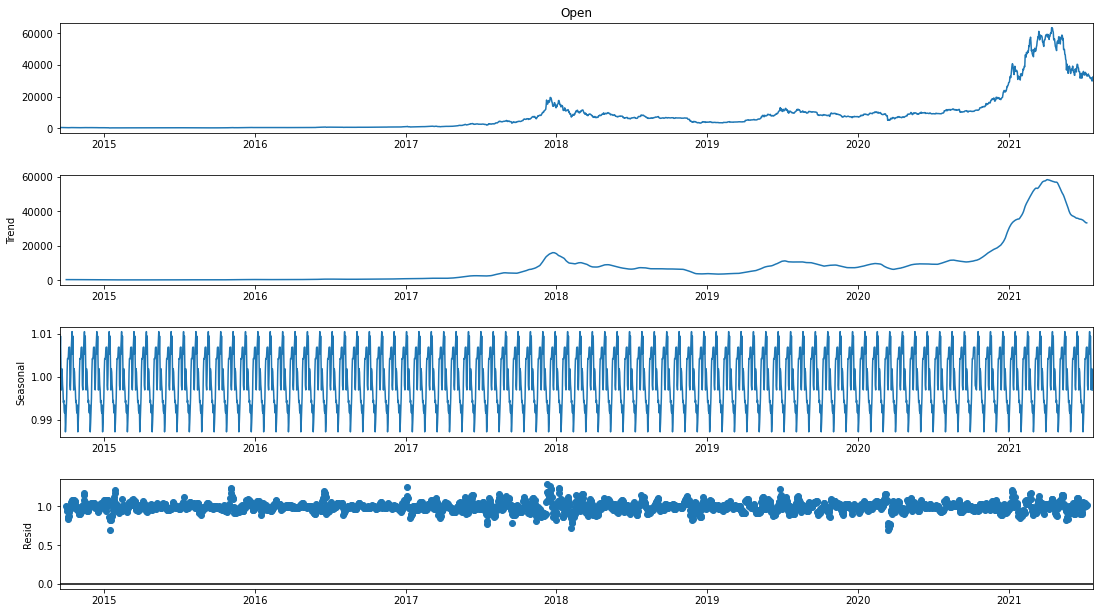

<Figure size 720x432 with 0 Axes>

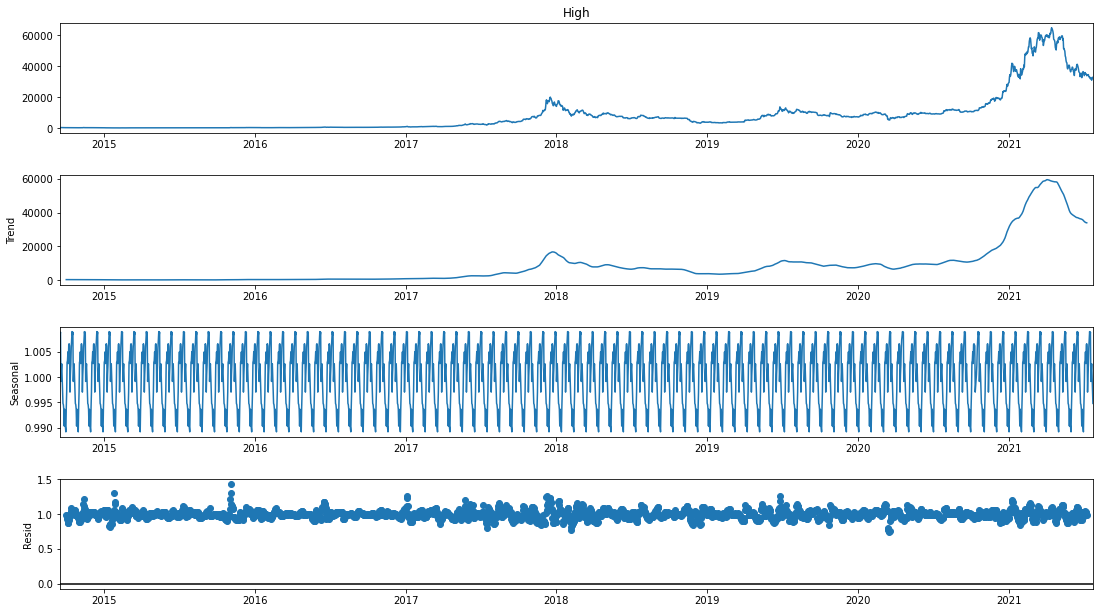

<Figure size 720x432 with 0 Axes>

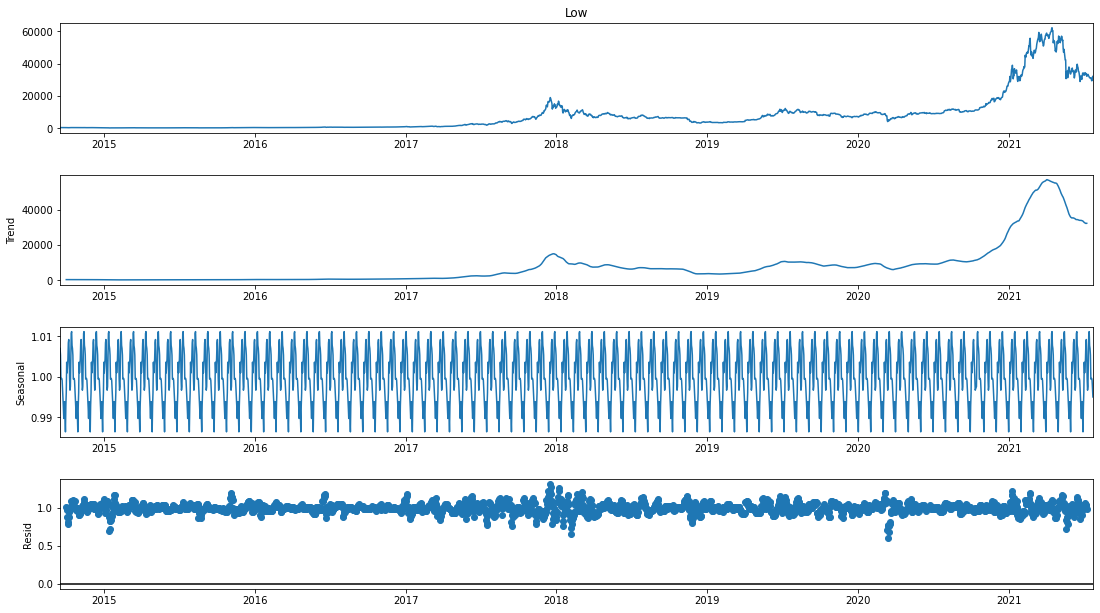

<Figure size 720x432 with 0 Axes>

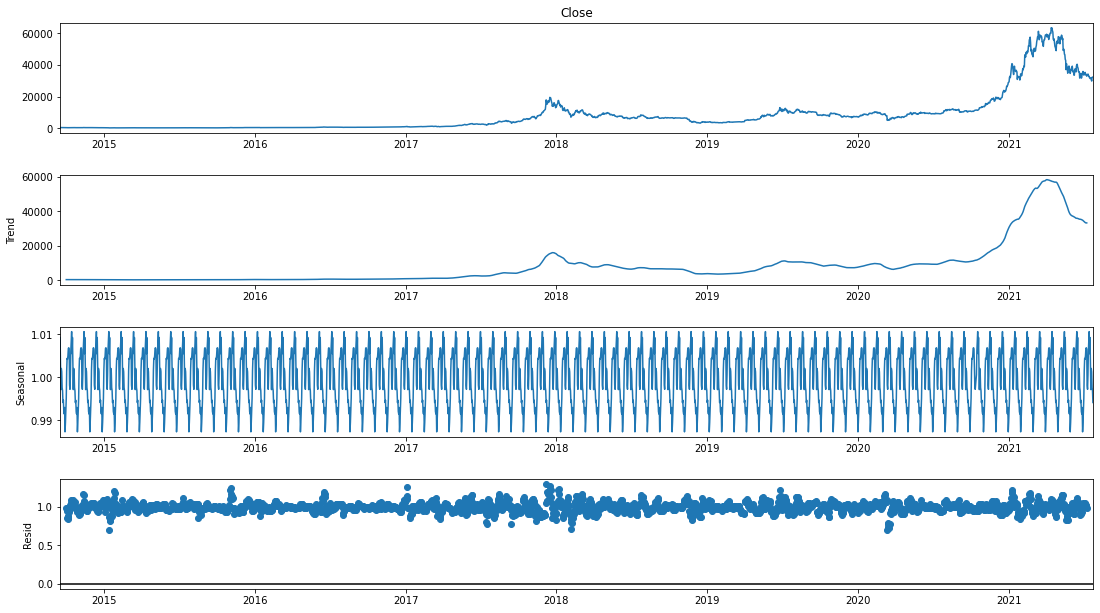

<Figure size 720x432 with 0 Axes>

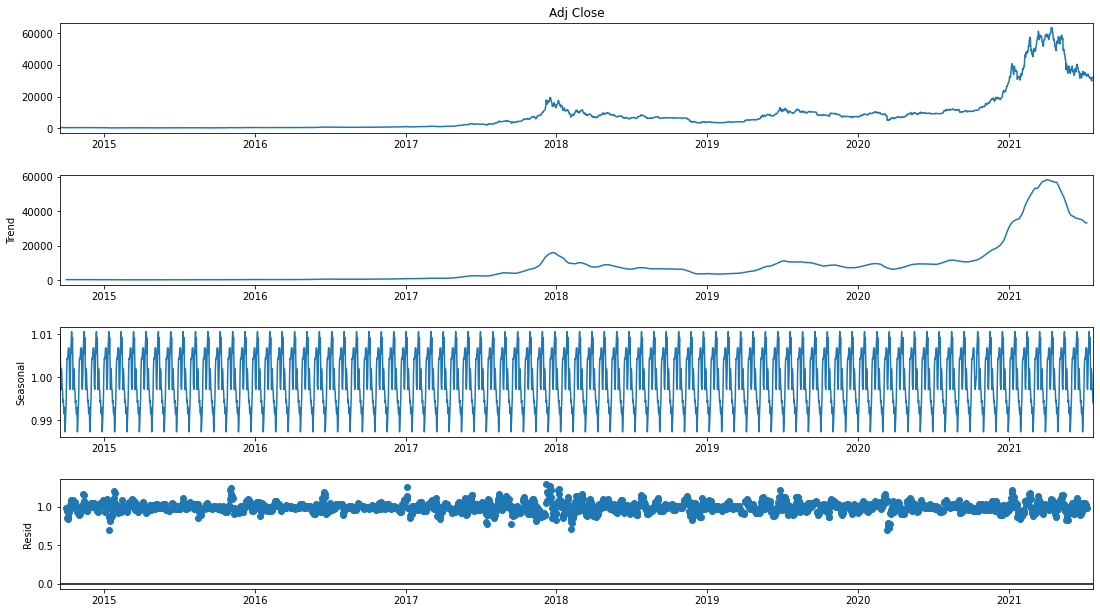

<Figure size 720x432 with 0 Axes>

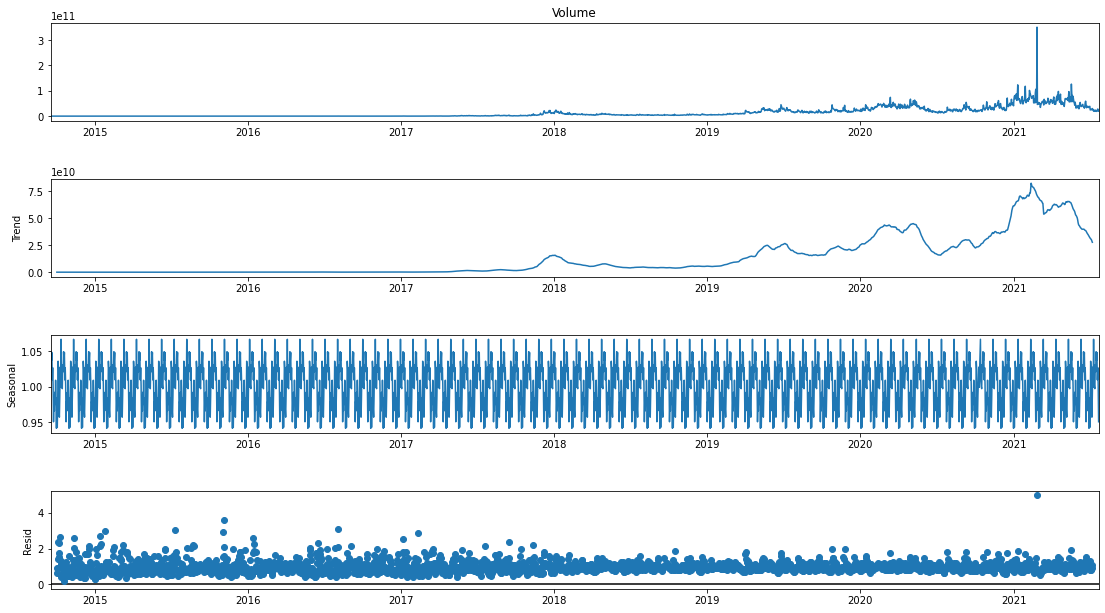

In [26]:
for col in columns:
    result = seasonal_decompose(df[col], model='multiplicative', freq = 30)
    fig = plt.figure()  
    fig = result.plot()  
    fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


Open



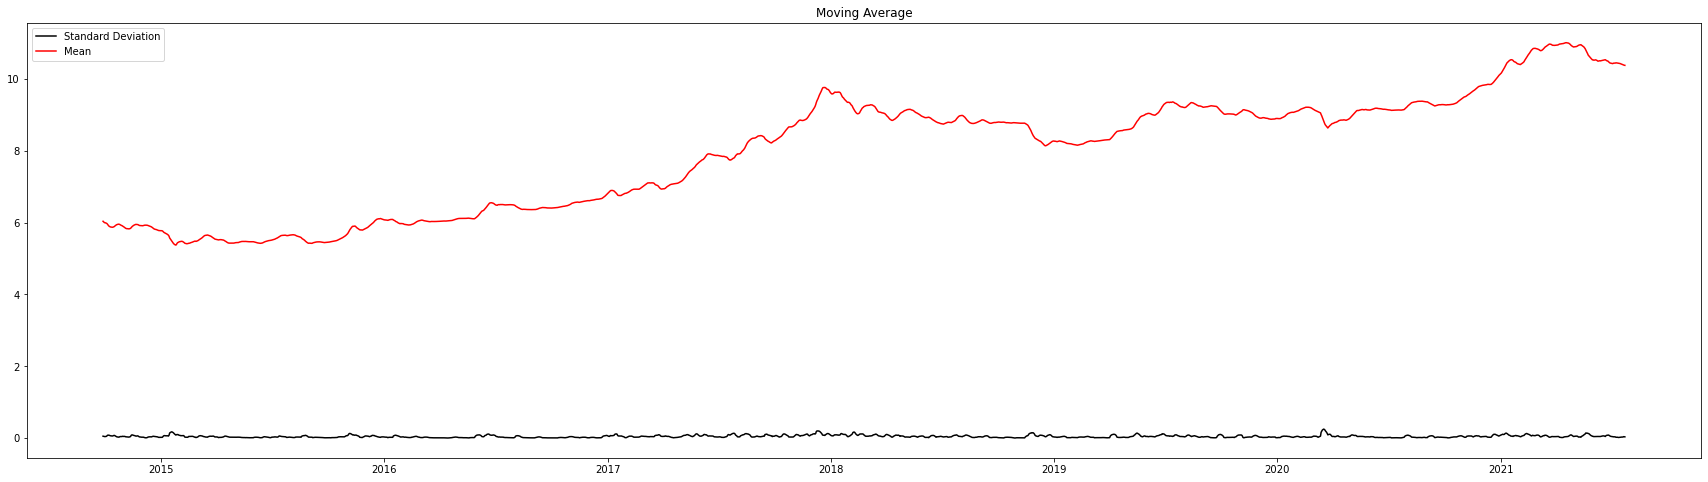

No handles with labels found to put in legend.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

High



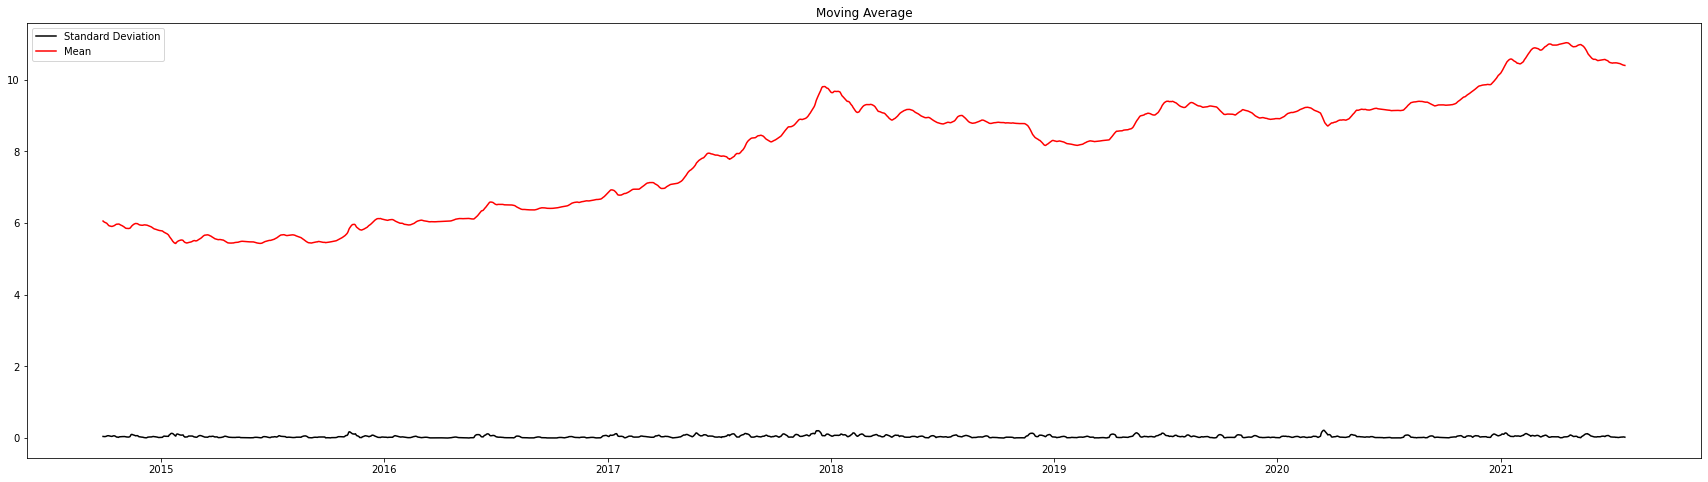

No handles with labels found to put in legend.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Low



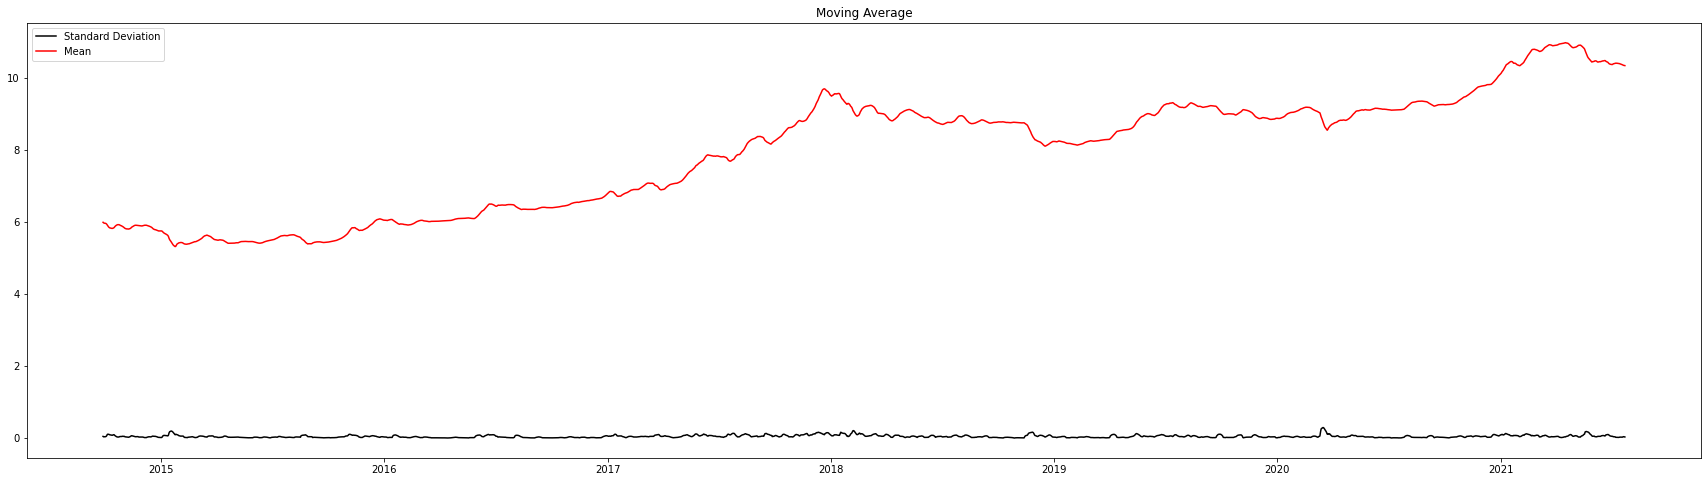

No handles with labels found to put in legend.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Close



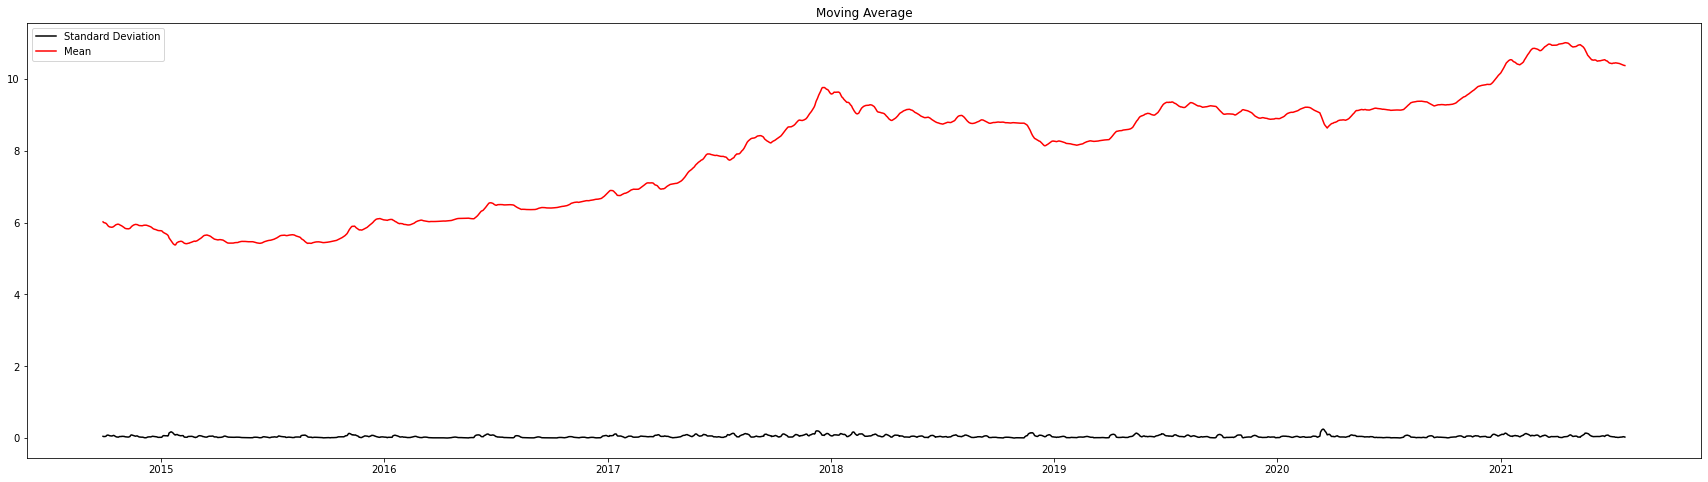

No handles with labels found to put in legend.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Adj Close



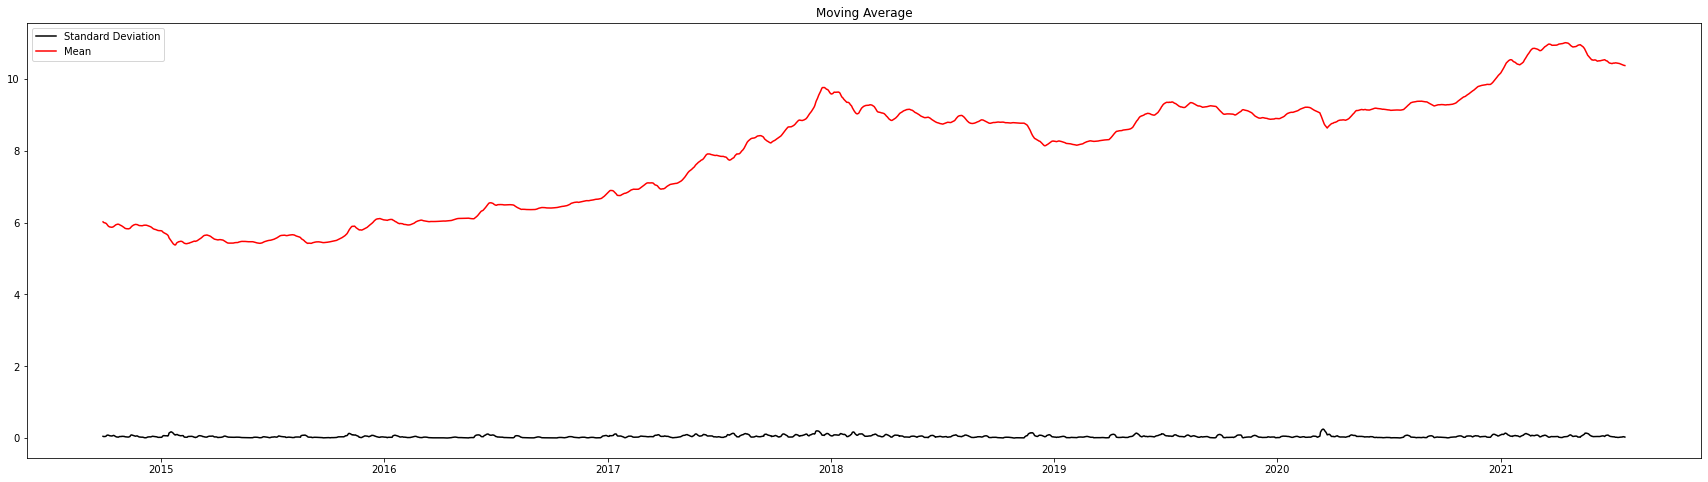

No handles with labels found to put in legend.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Volume



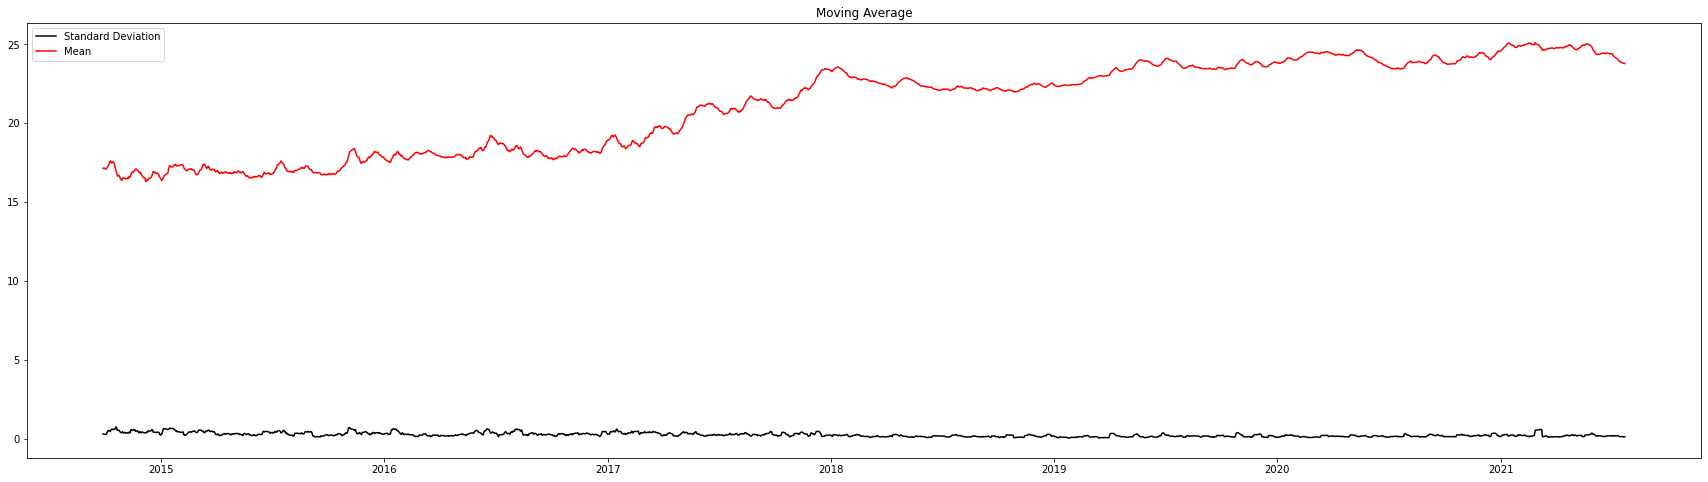

---------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 8
for col in columns:
    
    print('\033[1m' + col)
    print('\033[0m')
    df_log = np.log(df[col])
    moving_avg = df_log.rolling(12).mean()
    std_dev = df_log.rolling(12).std()
    plt.legend(loc='best')
    plt.title('Moving Average')
    plt.plot(std_dev, color ="black", label = "Standard Deviation")
    plt.plot(moving_avg, color="red", label = "Mean")
    plt.legend()
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print()

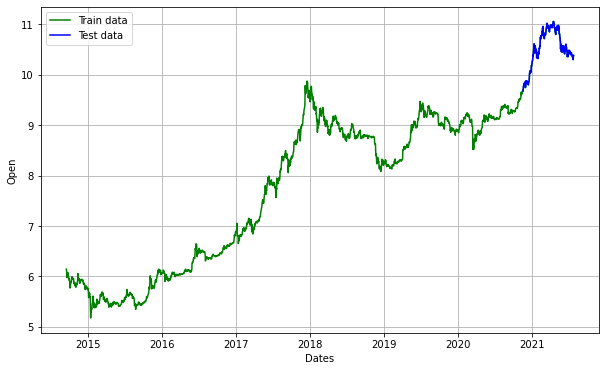

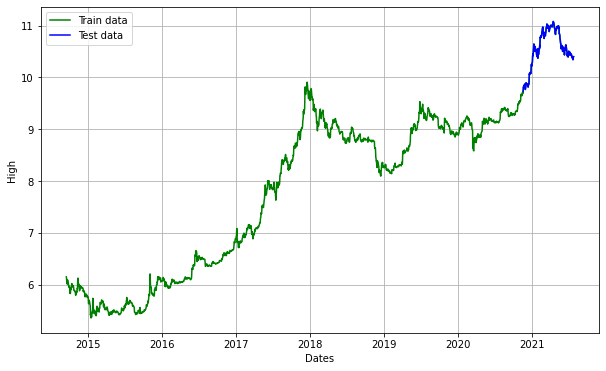

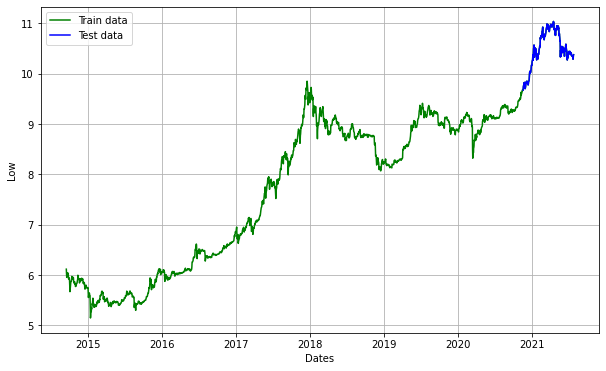

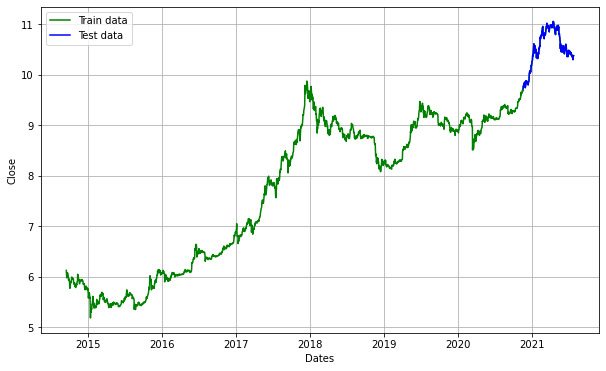

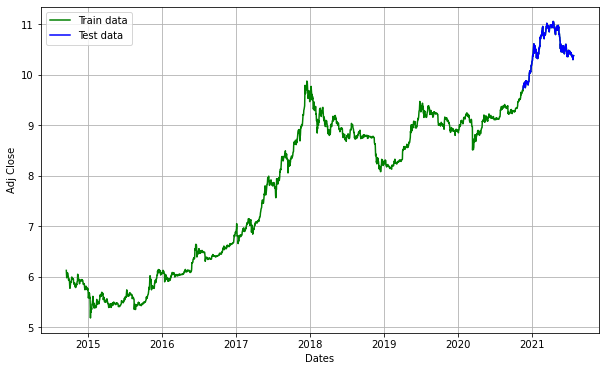

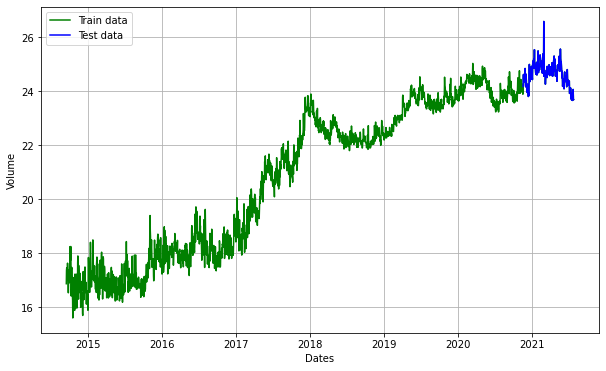

In [28]:
for col in columns:
    #split data into train and training set
    
    df_log = np.log(df[col])
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel(col)
    plt.plot(df_log, 'green', label='Train data')
    plt.plot(test_data, 'blue', label='Test data')
    plt.legend()
    

Open

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39418.879, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39407.099, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39408.756, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39417.850, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39399.138, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=39397.119, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39397.736, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39396.482, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39403.608, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39397.847, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39395.911, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=39397.941, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=39397.843, Time=1.00 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=39397.308, Time=0.27 sec
 ARIMA(2,1,3)

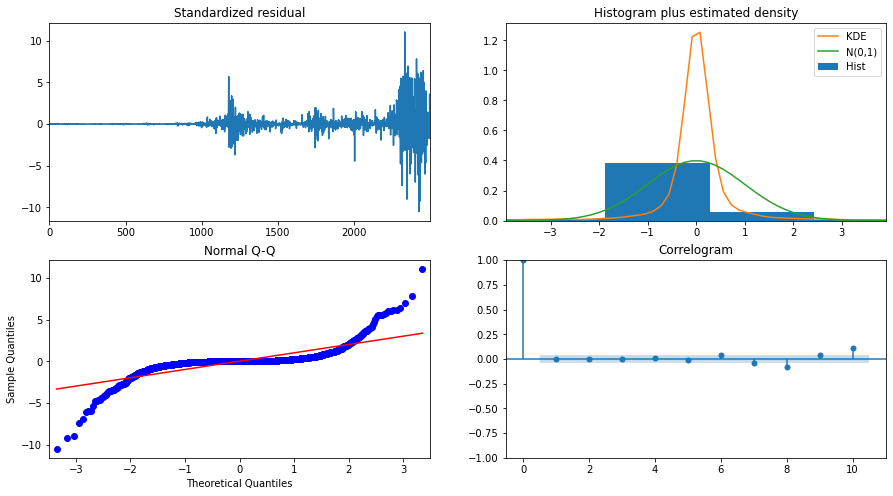

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
High

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38716.030, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38699.824, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38702.383, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38715.353, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=38687.703, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=38685.743, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=38659.604, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38657.688, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38689.103, Time=1.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38659.458, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38657.819, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : A

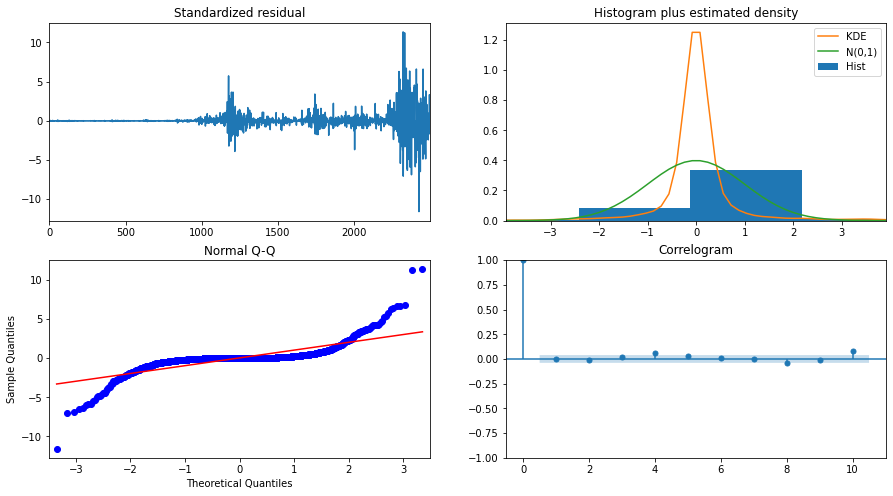

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Low

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39593.468, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39595.461, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39595.464, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39592.359, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39597.462, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.594 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2498
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -19795.179
Date:                Sat, 24 Jul 2021   AIC                          39592.359
Time:                        01:32:22   BIC      

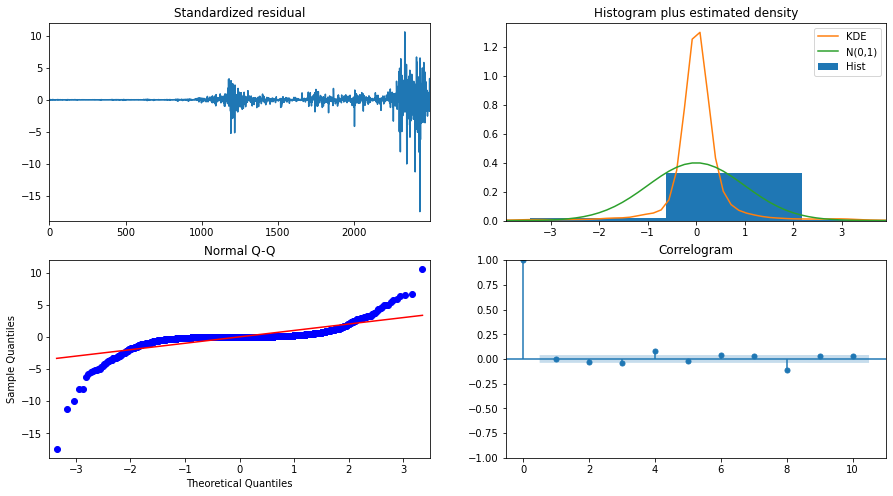

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Close

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39412.238, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39402.476, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39403.794, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39411.206, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39396.015, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=39394.061, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39394.386, Time=1.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39392.058, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39400.028, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39394.403, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39392.609, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : 

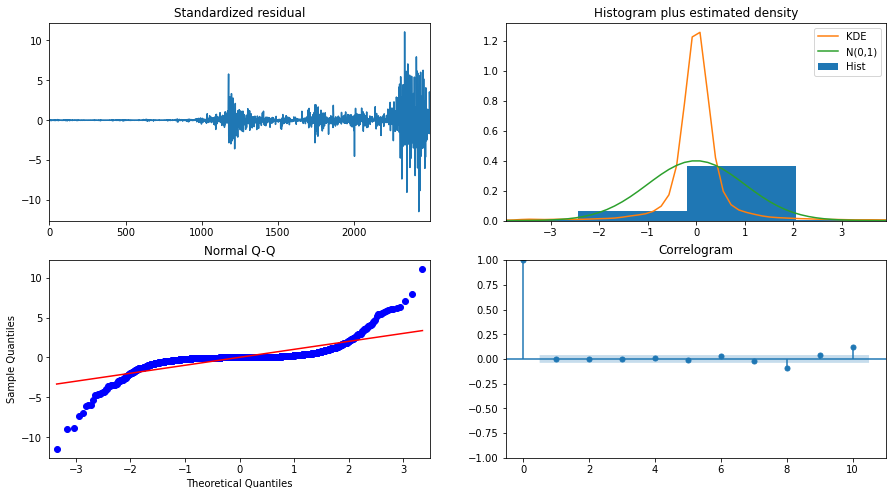

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Adj Close

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39412.238, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39402.476, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39403.794, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39411.206, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39396.015, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=39394.061, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39394.386, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39392.058, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39400.028, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39394.403, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39392.609, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept 

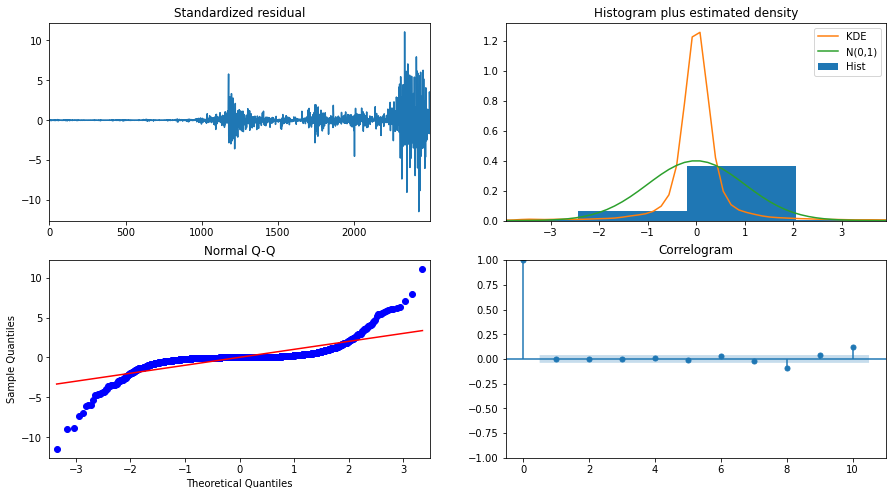

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Volume

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126432.996, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=122009.711, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=125106.956, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=121504.064, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=121174.774, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=120974.069, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=120974.582, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=120965.452, Time=1.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=120965.820, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=120945.304, Time=1.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=120965.970, Time=0.47 sec
 ARIMA(3,0,3)(0,0,0)[0] in

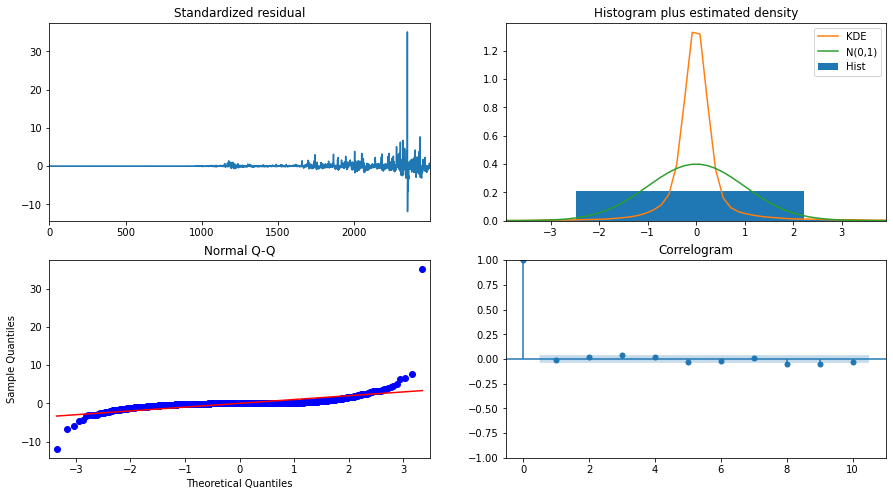

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [29]:
for col in columns:
    print('\033[1m' + col)
    print('\033[0m')
    model_autoARIMA = auto_arima(df[col], start_p=0, start_q=0,
                          test='adf',       # use adftest to find             optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=1,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

    print(model_autoARIMA.summary())
    model_autoARIMA.plot_diagnostics(figsize=(15,8))
    plt.show()
    
    print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

In [30]:
dict_order = {}
for col in columns:  
    
    print('\033[1m' + col)
    print('\033[0m')
    model_autoARIMA = auto_arima(df[col], start_p=0, start_q=0,
                          test='adf',       # use adftest to find             optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=1,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    order = model_autoARIMA.order
    print(order)
    dict_order[col] = order
    print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

Open

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39418.879, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39407.099, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39408.756, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39417.850, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39399.138, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=39397.119, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39397.736, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39396.482, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39403.608, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39397.847, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39395.911, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=39397.941, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=39397.843, Time=1.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=39397.308, Time=0.29 sec
 ARIMA(2,1,3)

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=125106.956, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=121504.064, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=121174.774, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=120974.069, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=120974.582, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=120965.452, Time=1.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=120965.820, Time=0.60 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=120945.304, Time=1.78 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=120965.970, Time=0.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=120948.306, Time=2.72 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 8.398 seconds
(3, 0, 3)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [31]:
dict_order

{'Open': (1, 1, 2),
 'High': (2, 1, 1),
 'Low': (0, 1, 0),
 'Close': (1, 1, 2),
 'Adj Close': (1, 1, 2),
 'Volume': (3, 0, 3)}

In [32]:
for col in columns:
    #split data into train and training set
    print('\033[1m' + col)
    print('\033[0m')
    df_log = np.log(df[col])
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    model = ARIMA(train_data, order= dict_order[col])  
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    

Open



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 2244
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4121.283
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sat, 24 Jul 2021   AIC                          -8232.567
Time:                        01:33:41   BIC                          -8203.987
Sample:                             1   HQIC                         -8222.134
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0017      0.001      1.817      0.069      -0.000       0.003
ar.L1.D.Open     0.9323      0.094      9.918      0.000       0.748       1.117
ma.L1.D.Open    -0.9486      0.096     -9.86

C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 2244
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4411.021
Method:                       css-mle   S.D. of innovations              0.034
Date:                Sat, 24 Jul 2021   AIC                          -8812.043
Time:                        01:33:42   BIC                          -8783.462
Sample:                             1   HQIC                         -8801.610
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0016      0.001      2.039      0.041    6.28e-05       0.003
ar.L1.D.High     0.0746      0.253      0.295      0.768      -0.422       0.571
ar.L2.D.High    -0.0496      0.044     -1.12

C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2244
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4104.969
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sat, 24 Jul 2021   AIC                          -8199.938
Time:                        01:33:43   BIC                          -8171.358
Sample:                             1   HQIC                         -8189.505
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.001      1.789      0.074      -0.000       0.003
ar.L1.D.Close     0.9357      0.094      9.943      0.000       0.751       1.120
ma.L1.D.Close    -0.9556      0.096     

C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 2244
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4104.969
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sat, 24 Jul 2021   AIC                          -8199.938
Time:                        01:33:44   BIC                          -8171.358
Sample:                             1   HQIC                         -8189.505
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0016      0.001      1.789      0.074      -0.000       0.003
ar.L1.D.Adj Close     0.9357      0.094      9.943      0.000       0.751       1.120
ma.L1.D.Adj Close    -0.

C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                 2245
Model:                     ARMA(3, 3)   Log Likelihood                -328.607
Method:                       css-mle   S.D. of innovations              0.280
Date:                Sat, 24 Jul 2021   AIC                            673.213
Time:                        01:33:46   BIC                            718.945
Sample:                             0   HQIC                           689.907
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.6876      2.340      8.839      0.000      16.100      25.275
ar.L1.Volume     1.9365      0.013    154.265      0.000       1.912       1.961
ar.L2.Volume    -1.4049      0.018    -77.35

Open



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


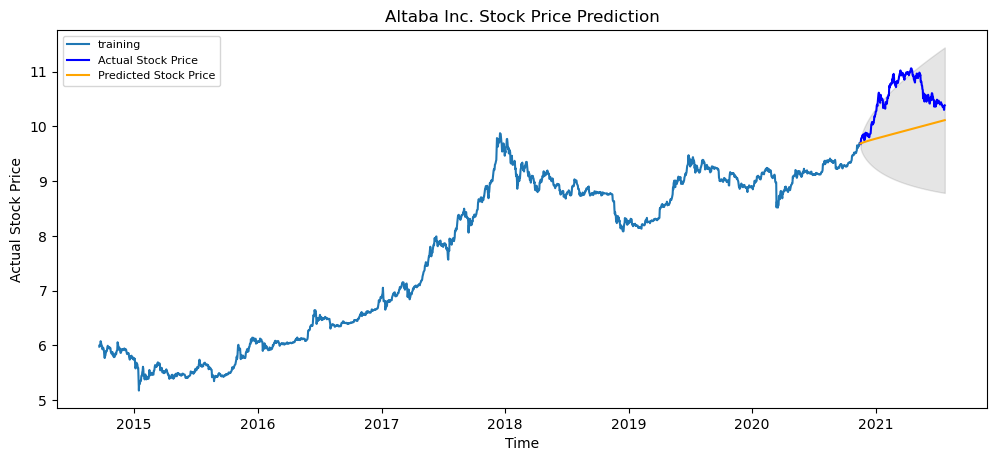

High



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


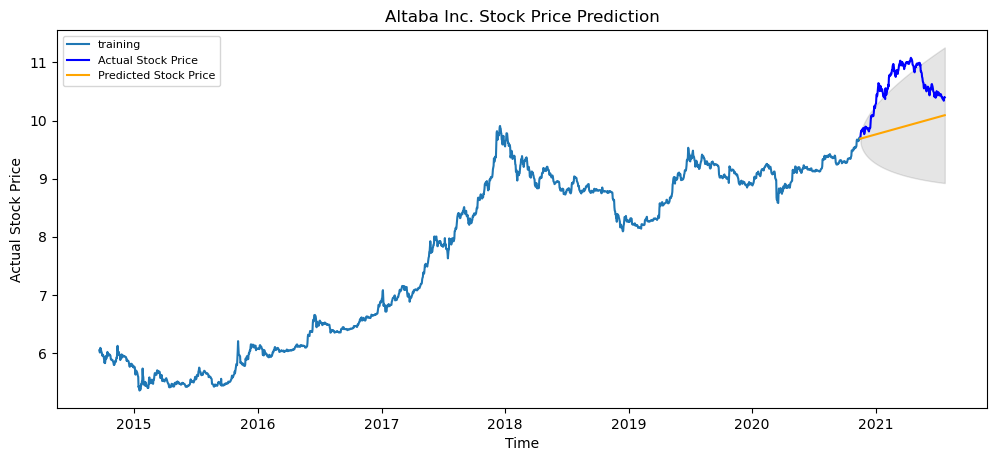

Low



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


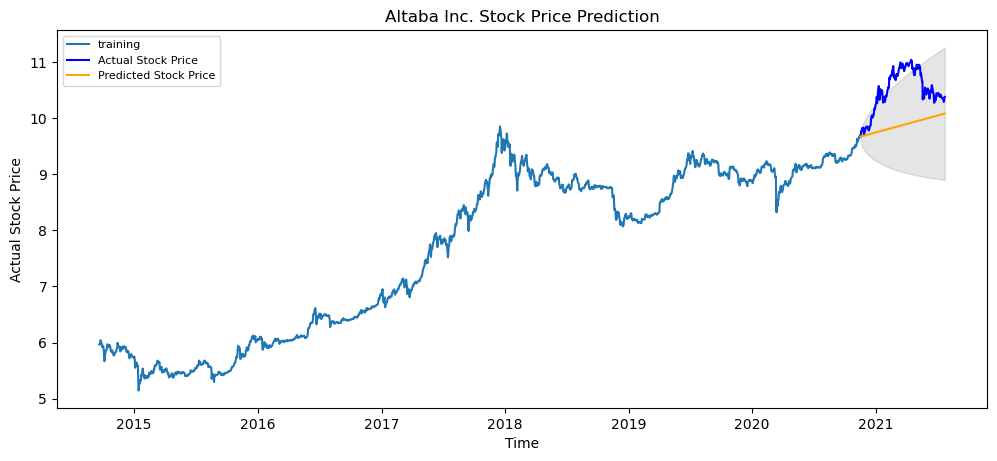

Close



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


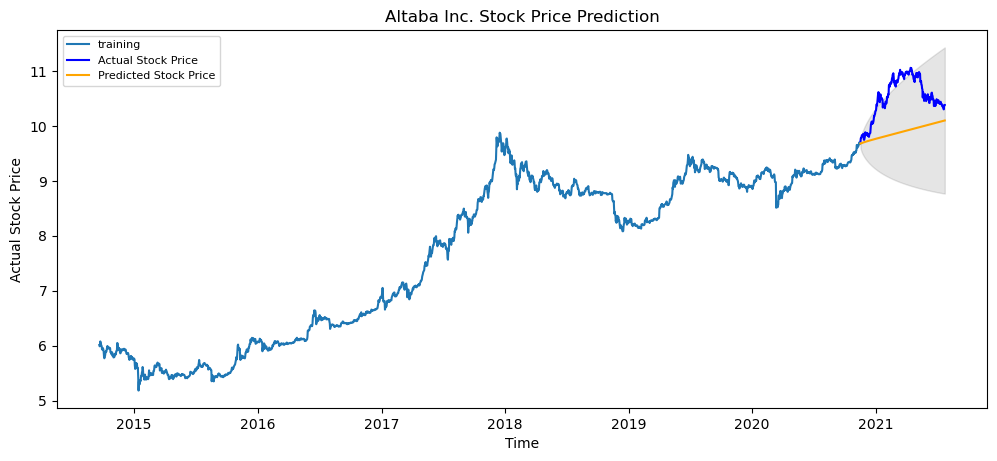

Adj Close



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


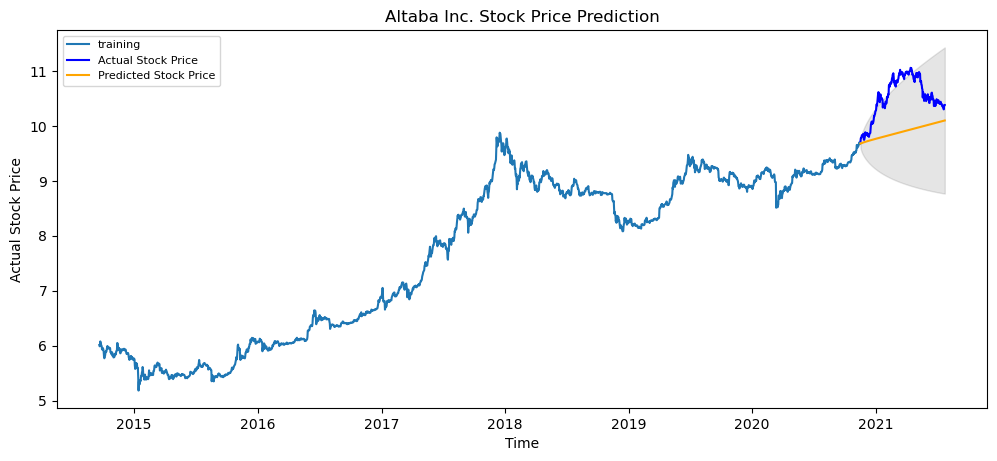

Volume



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


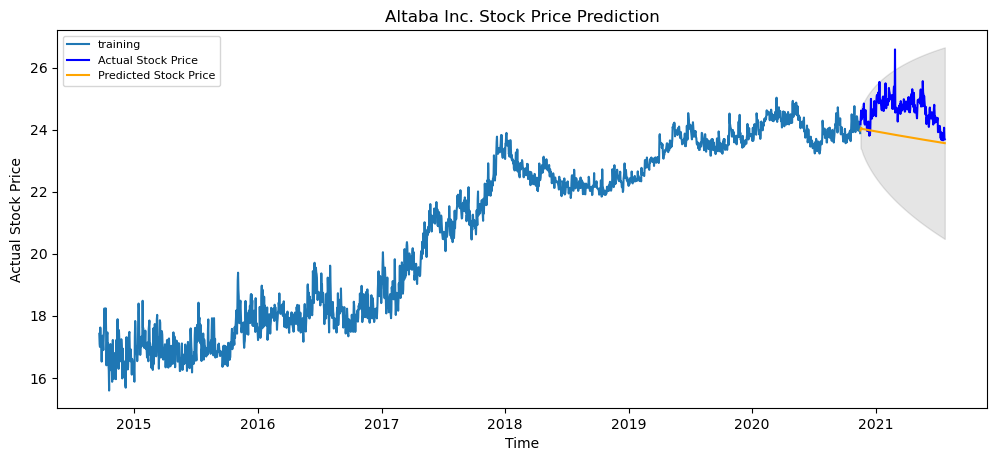

In [36]:
for col in columns:
    
    #split data into train and training set
    print('\033[1m' + col)
    print('\033[0m')
    df_log = np.log(df[col])
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    
    model = ARIMA(train_data, order= dict_order[col])  
    fitted = model.fit(disp=-1)  
    
    # Forecast
    fc, se, conf = fitted.forecast(250, alpha=0.05)  # 95% confidence
    fc_series = pd.Series(fc, index=test_data.index)
    lower_series = pd.Series(conf[:, 0], index=test_data.index)
    upper_series = pd.Series(conf[:, 1], index=test_data.index)
    
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train_data, label='training')
    plt.plot(test_data, color = 'blue', label='Actual Stock Price')
    plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.10)
    plt.title('Altaba Inc. Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Actual Stock Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

In [37]:
for col in columns:
    
    #split data into train and training set
    print('\033[1m' + col)
    print('\033[0m')
    df_log = np.log(df[col])
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    
    model = ARIMA(train_data, order= dict_order[col])  
    fitted = model.fit(disp=-1)  
    
    # Forecast
    fc, se, conf = fitted.forecast(250, alpha=0.05)  # 95% confidence
    fc_series = pd.Series(fc, index=test_data.index)
    lower_series = pd.Series(conf[:, 0], index=test_data.index)
    upper_series = pd.Series(conf[:, 1], index=test_data.index)
    
# report performance
    mse = mean_squared_error(test_data, fc)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(test_data, fc)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mean_squared_error(test_data, fc))
    print('RMSE: '+str(rmse))
    mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
    print('MAPE: '+str(mape))

Open



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MSE: 0.500339040893904
MAE: 0.6272197152710335
RMSE: 0.7073464786749871
MAPE: 0.05857064096044518
High



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MSE: 0.565505414434445
MAE: 0.67649608709626
RMSE: 0.7520009404478462
MAPE: 0.06305666240345383
Low

MSE: 0.49455651322511834
MAE: 0.6224072404939418
RMSE: 0.7032471210215641
MAPE: 0.058326591857766015
Close



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

MSE: 0.5176270349786457
MAE: 0.6414920601272633
RMSE: 0.7194630184927129
MAPE: 0.059926568722401916
Adj Close



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MSE: 0.5176270349786457
MAE: 0.6414920601272633
RMSE: 0.7194630184927129
MAPE: 0.059926568722401916
Volume



C:\Users\dipan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MSE: 0.8544248630041354
MAE: 0.8364691269899113
RMSE: 0.9243510496581564
MAPE: 0.03372509703681819
